## Генерация данных

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [29]:
def generate_linear_data(num_samples=200, noise=0.1, k=-1, b=2, margin=0.5):
    X = []
    y = []
    while len(X) < num_samples:
        point = np.random.uniform(-5, 5, size=2)
        distance = point[1] - (k * point[0] + b)
        
        if distance > margin:
            X.append(point)
            y.append(1)
        elif distance < -margin:
            X.append(point)
            y.append(0)
    
    X = np.array(X)
    y = np.array(y)
    
    if noise > 0:
        flip_indices = np.random.choice(num_samples, int(noise * num_samples), replace=False)
        y[flip_indices] = 1 - y[flip_indices]
    
    return X, y


def generate_nonlinear_data(num_samples=200, noise=0.1, a=2, b=1, margin=0.5):
    num_samples_per_class = num_samples // 2
    X_inner, X_outer = [], []
    
    while len(X_inner) < num_samples_per_class:
        point = np.random.uniform(
            [-a + margin, -b + margin], [a - margin, b - margin]
        )
        distance = (point[0]**2 / (a - margin)**2) + (point[1]**2 / (b - margin)**2)
        if distance < 1:
            X_inner.append(point)
    
    while len(X_outer) < num_samples_per_class:
        point = np.random.uniform([-2*a, -2*b], [2*a, 2*b])
        distance = (point[0]**2 / (a + margin)**2) + (point[1]**2 / (b + margin)**2)
        if distance > 1:
            X_outer.append(point)
    
    X = np.vstack((X_inner, X_outer))
    y = np.hstack((np.ones(len(X_inner)), np.zeros(len(X_outer))))
    
    if noise > 0:
        flip_indices = np.random.choice(num_samples, int(noise * num_samples), replace=False)
        y[flip_indices] = 1 - y[flip_indices]
    
    return X, y

Прогон:

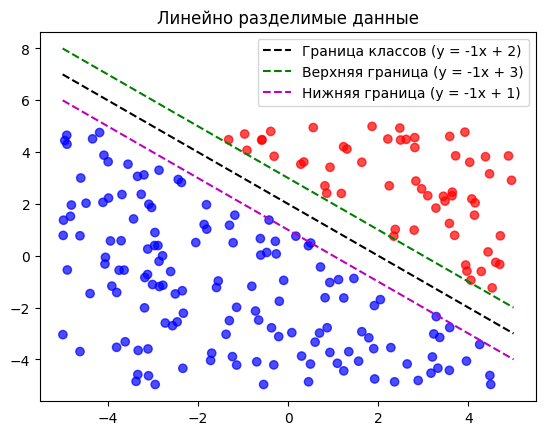

In [30]:
k = -1
b = 2
margin = 1
X_linear, y_linear = generate_linear_data(num_samples=200, noise=0.0, k=k, b=b, margin=margin)
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap='bwr', alpha=0.7)
x_vals = np.linspace(-5, 5, 100)
y_vals = k * x_vals + b  # y = kx + b
y_top = y_vals + margin
y_bot = y_vals - margin
plt.plot(x_vals, y_vals, 'k--', label=f"Граница классов (y = {k}x + {b})")
plt.plot(x_vals, y_top, 'g--', label=f'Верхняя граница (y = {k}x + {b + margin})')
plt.plot(x_vals, y_bot, 'm--', label=f'Нижняя граница (y = {k}x + {b - margin})')
plt.title("Линейно разделимые данные")
plt.legend()
plt.show()

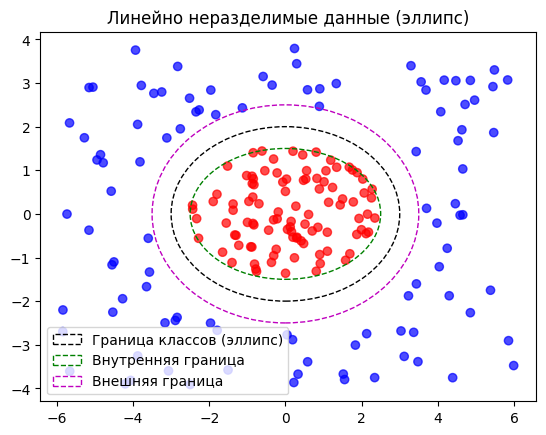

In [32]:
a = 3
b = 2
margin = 0.5
X_nonlinear, y_nonlinear = generate_nonlinear_data(num_samples=200, noise=0.0, a=a, b=b, margin=margin)
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, cmap='bwr', alpha=0.7)
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, edgecolor='k', facecolor='none', linestyle='--', label="Граница классов (эллипс)")
plt.gca().add_patch(ellipse)
inside = Ellipse(xy=(0, 0), width=2*(a - margin), height=2*(b - margin), edgecolor='g', facecolor='none', linestyle='--', label='Внутренняя граница')
plt.gca().add_patch(inside)
outside = Ellipse(xy=(0, 0), width=2*(a + margin), height=2*(b + margin), edgecolor='m', facecolor='none', linestyle='--', label='Внешняя граница')
plt.gca().add_patch(outside)
plt.title("Линейно неразделимые данные (эллипс)")
plt.legend()
plt.show()